In [68]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Se importan las funciones personalizadas
import sys
sys.path.append('..\\utils\\')

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from utils import pca_componentes_optimos, classifier_performance

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier


## 1. Importando los datos

In [71]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv', sep=';')
dataset.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


## 2. Diviendo los datos en las variables predictoras (**X**) y la variables a predicir (y)

In [72]:
X = dataset.drop(columns=['status'], axis=1)
y = dataset['status']

## 3. Realizando el escalamiento de los datos

In [73]:
esc = RobustScaler()
datos_esc = esc.fit_transform(X=X)
X_escalado = pd.DataFrame(data=datos_esc, columns=X.columns.to_list())
X_escalado.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.263158,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,-0.527648,-0.662135,-0.005377,1.0,0.0,0.25
1,0.789474,0.444444,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.442372,0.294098,-0.005377,0.0,0.0,-0.25
2,2.078947,3.444444,1.0,2.0,1.0,0.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,-0.610260,0.001824,15.383959,0.0,0.0,-0.75
3,-0.763158,-0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.482345,-0.662135,0.279030,0.0,-1.0,0.00
4,0.210526,-0.444444,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,-0.050633,0.693302,0.017659,0.0,-1.0,0.75


## 4. Aplicando PCA para reducir la dimensión de los datos

Suma acumulada de la varianza explicada (%): 
[ 23.45693135  40.17520639  55.4338141   62.27979626  68.82088634
  72.96222404  76.51561814  79.50649572  82.07730578  83.99353579
  85.79416191  87.37534715  88.77511979  89.9767614   90.99499277
  91.96311951  92.82594176  93.66430109  94.30317942  94.85347918
  95.34391753  95.74774621  96.13223026  96.50332851  96.82044766
  97.10227633  97.3506055   97.54015939  97.72518511  97.88398911
  98.03796103  98.18063888  98.3173949   98.44013166  98.550765
  98.65777338  98.76183478  98.86376445  98.95911434  99.04764508
  99.13275681  99.21085896  99.28667756  99.35431471  99.42037299
  99.47974972  99.53018495  99.57732659  99.6216093   99.66254726
  99.69931144  99.73340968  99.76606239  99.79556868  99.8187339
  99.84015426  99.86093748  99.88015483  99.89646509  99.90989335
  99.92188853  99.93339945  99.9425166   99.95086587  99.95877758
  99.96611263  99.97144857  99.97642342  99.981204    99.98458462
  99.98771642  99.99063751  99.99

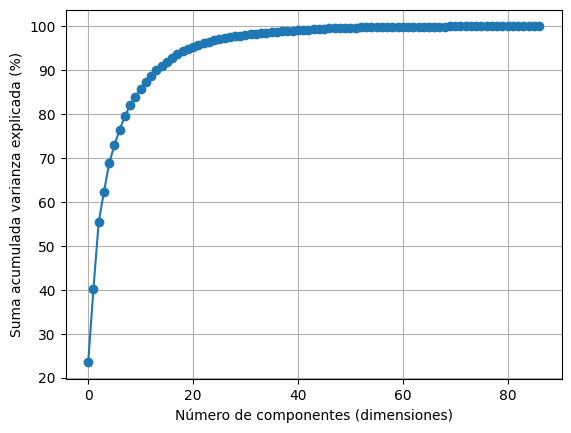

In [74]:
pca_componentes_optimos(dataset=X_escalado)

Se trabajará con 15 componentes para capturas el 90.99% de la variabilidad de los datos

## 5. Reduciendo el número de variables a 15

In [75]:
pca = PCA(n_components=15)
datos_pca = pca.fit_transform(X=X_escalado)
X_pca = pd.DataFrame(data=datos_pca, columns=['PCA_{}'.format(i) for i in range(1,16)])
X_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-3.684116,10.800387,-6.332714,-0.707059,-0.878399,-0.928219,-1.590756,-0.816178,-0.409049,0.105300,-1.264307,0.370415,0.324030,0.879482,-1.336711
1,-1.794803,0.039910,4.799719,1.766738,-2.712397,-1.553054,0.355302,0.189119,-0.707369,-1.643267,3.911256,-1.463905,2.520836,-1.373170,-0.971394
2,13.873139,0.361423,1.561321,-2.223891,0.552966,-1.464238,0.263118,-2.170705,0.532092,-1.894057,-0.090539,0.525335,-1.051504,-0.991225,0.366803
3,-2.698610,3.545754,-4.932144,0.836571,-1.939974,-0.618102,-0.891105,0.438875,0.861734,0.954409,-0.407296,-0.284038,-0.828118,0.245446,1.146521
4,-2.237090,-1.479358,-0.031606,-0.795821,-0.073041,-0.071845,-0.152298,1.896569,0.058546,0.852685,-0.811221,0.418269,-0.470084,1.422522,-2.006595


## 6. Diviendo los datos en entrenamiento y prueba

In [76]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

## 7. Creando el ensamble y realizando la validación cruzada

In [77]:
tree = DecisionTreeClassifier(max_depth=12)
lr = LogisticRegressionCV(cv=5)
sgdc = SGDClassifier()
svc_lineal = LinearSVC(C=0.9)
svc_rad_gau = SVC(C=1, kernel='rbf', gamma=0.05)

estimadores = [('tree', tree),('lr', lr),('sgdc', sgdc),('svc_lineal', svc_lineal),('svc_rad_gau', svc_rad_gau)]

voting_clf = VotingClassifier(estimators=estimadores, voting='hard')

y_train_pred = cross_val_predict(estimator=voting_clf, X=X_pca_train, y=y_train, cv=4)


## 8. Evaluando el modelo con los datos de entrenamiento

Desempeño del clasificador:
---------------------------
Precisión:	86.48 %
Sensibilidad:	86.54 %
Puntaje F1:	86.51 %


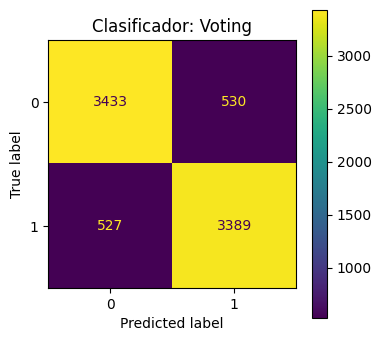

In [78]:
classifier_performance( y_pred_=y_train_pred, y_true_=y_train, titulo = 'Clasificador: Voting' ) 

## 9. Realizando predicciones

In [79]:
voting_clf.fit(X=X_pca_train, y=y_train)  #Entrenando el modelo
y_pred = voting_clf.predict(X=X_pca_test) #Realizando las predicciones

#### 9.1 Evaluando el desempeño del modelo con los datos de prueba

Desempeño del clasificador:
---------------------------
Precisión:	86.38 %
Sensibilidad:	85.48 %
Puntaje F1:	85.93 %


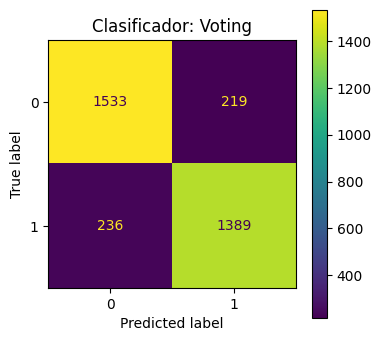

In [80]:
classifier_performance(y_pred_=y_pred, y_true_=y_test, titulo = 'Clasificador: Voting')